# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(25,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')


NameError: name 'plt' is not defined

In [3]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read data from a csv
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [4]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [5]:
#converting date to date timestamp
df['Date'] = pd.DatetimeIndex(df['Date']).date
lis = ['2922008','2922012'] #list of 29 Febs appearing in each leap year
dates = [datetime.datetime.strptime(i, '%d%m%Y').date() for i in lis] #converting into list of datetime.date objects
df = df[~df['Date'].isin(dates)] #remove all 29 February dates

In [6]:
#creating a separate column for the month
df['Month'] = pd.DatetimeIndex(df['Date']).month
#we are colleting dates between 2005 - 2014, so want to remove any data from dates after 31 Dec 2014
#creating datetime.date format of cutoff date
a= '31122014'
#converting a string into datetime.date object
cutoff_date = datetime.datetime.strptime(a,'%d%m%Y').date()
#dataframe for values after 31 Dec 2014
df2 = df[df['Date'] <= cutoff_date]
#returning dates before cutoff date
df3 = df[df['Date'] > cutoff_date]

In [7]:
df_min = df2[df2['Element'] =='TMIN'].groupby('Month').aggregate({'Data_Value':np.min})
df_max = df2[df2['Element'] == 'TMAX'].groupby('Month').aggregate({'Data_Value':np.max})

In [8]:
plt.plot(df_max, '-o',df_min,'-o')

In [9]:
x = df_max.index.values
plt.fill_between(x,df_min.values.flatten(),df_max.values.flatten(), color='grey',alpha='0.5')

In [10]:
#superimpose scatterplot
df3_max = df3[df3['Data_Value'] > df3['Month'].map(df_max['Data_Value'])]
df4_min = df3[df3['Data_Value'] < df3['Month'].map(df_min['Data_Value'])]
plt.scatter(df3_max.Month.tolist(),df3_max['Data_Value'],s=10,c='red') #values over max
plt.scatter(df4_min.Month.tolist(),df4_min['Data_Value'],s=10,c='black') #values under min

In [11]:
plt.xticks(list(df_max.index),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']) #we want to show all the x values and rename according to the month

([<matplotlib.axis.XTick at 0x7f0d9e4079e8>,
 <a list of 12 Text xticklabel objects>)

In [12]:
df_max['Data_Value'] = df_max['Data_Value']/10
df_min['Data_Value'] = df_min['Data_Value']/10
df4_min['Data_Value'] = df4_min['Data_Value']/10
df3_max['Data_Value'] = df3_max['Data_Value']/10

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


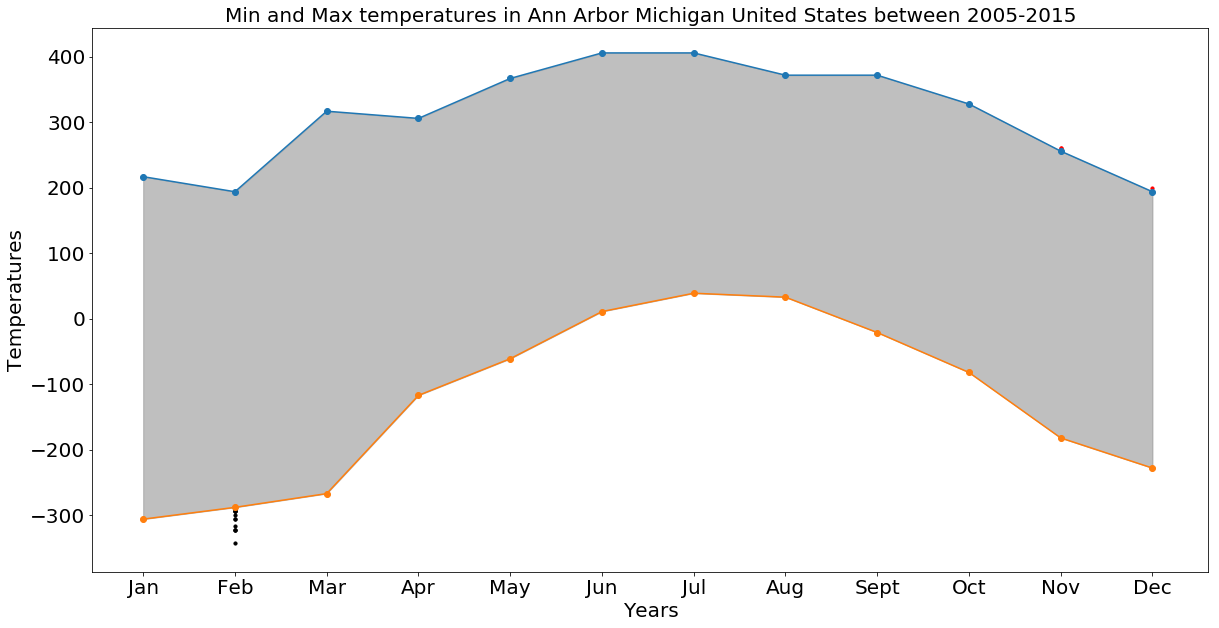

In [13]:
plt.title('Min and Max temperatures in Ann Arbor Michigan United States between 2005-2015', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Temperatures', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.tick_params(labelsize=20)
plt.show()